# Анализ убытков развлекательного приложения

**Проблема**

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания Procrastinate Pro+ терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

**Цели**

1. Провести подготовку данных к анализу
2. Провести исследовательский анализ данных:
 +  откуда приходят пользователи и какими устройствами они пользуются,
 + сколько стоит привлечение пользователей из различных рекламных каналов;
 + сколько денег приносит каждый клиент,
 + когда расходы на привлечение клиента окупаются,
 + какие факторы мешают привлечению клиентов.

**План работы**

1. Обзор и предобработка данных
2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии
3. Исследовательский анализ данных
4. Анализ расходов на маркетинг
5. Оценка окупаемости рекламы
6. Итоги
7. Рекомендации

**Данные**

Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, находятся в трех файлах.


+ Структура `visits_info_short.csv` (информациея о посещениях сайта):

 + `User Id` — уникальный идентификатор пользователя,

 + `Region` — страна пользователя,

 + `Device` — тип устройства пользователя,

 + `Channel` — идентификатор источника перехода,

 + `Session Start` — дата и время начала сессии,

 + `Session End` — дата и время окончания сессии.


+ Структура `orders_info_short.csv` (информация о заказах):

 + `User Id` — уникальный идентификатор пользователя,

 + `Event Dt` — дата и время покупки,

 + `Revenue` — сумма заказа.


+ Структура `costs_info_short.csv` (информация о расходах на рекламу):

 + `dt` — дата проведения рекламной кампании,

 + `Channel` — идентификатор рекламного источника,

 + `costs` — расходы на эту кампанию.

### Обзор и предобработка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
from matplotlib import pyplot as plt

In [2]:
visits=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
costs=pd.read_csv('/datasets/costs_info_short.csv')

**visits**

In [3]:
print(visits.info()) # смотрим на тип данных
print(visits.head())
print(visits.isna().sum()) # ищем пропуски 
print(visits.duplicated().sum()) # ищем дубликаты

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:4

Пропусков и дубликатов не обнаружено. 

Преобразуем колонки **visits['Session Start']** & **visits['Session End']** к типу datetime

In [4]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])

***orders***

In [5]:
orders.info()
print(orders.head())
print(orders.isna().sum())
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
User Id     0
Event Dt    0
Revenue     0
dtype: int64


0

Пропусков и дубликатов не обнаружено. 

Преобразуем **orders['Event Dt']** к типу datetime

In [6]:
orders['Event Dt']=pd.to_datetime(orders['Event Dt'])

***costs***

In [7]:
costs.info()
print(costs.head())
print(costs.isna().sum())
costs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
dt         0
Channel    0
costs      0
dtype: int64


0

Пропусков и дубликатов не обнаружено. 

Преобразуем **costs['dt']** к типу date

In [8]:
costs['dt']=pd.to_datetime(costs['dt']).dt.date

Приведем названия столбцов к нижнему регистру + заменим пробелы на нижнее подчеркивание. 

In [9]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
print(visits.columns)

orders.columns = orders.columns.str.lower().str.replace(' ', '_')
print(orders.columns)

costs.columns = costs.columns.str.lower().str.replace(' ', '_')
print(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


Отфильтруем таблице по дате

In [10]:
# оставим посещения и заказы только за интересующий нас период, т.е. с 1 мая по 27 октября 2019 года:
visits = visits[(visits['session_start'] >= '2019-05-01 00:00:00') & (visits['session_start'] < '2019-10-28 00:00:00')]
print('Количестов строк в новом датафрейме visits:', visits.shape[0])

orders = orders[(orders['event_dt'] >= '2019-05-01 00:00:00') & (orders['event_dt'] < '2019-10-28 00:00:00')]
print('Количестов строк в новом датафрейме orders:', orders.shape[0])

Количестов строк в новом датафрейме visits: 306253
Количестов строк в новом датафрейме orders: 39125


**Проверка на выбросы в данных**

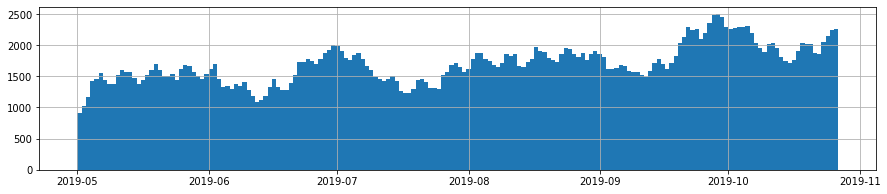

In [11]:
#посмотрим на посещаемость в течении всего периода
visits['session_start'].dt.date.hist(bins = 180, figsize = (15,3));

Видно, что за полгода посещаемость выросла в 2 раза

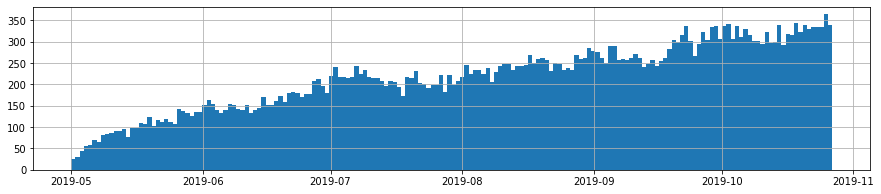

In [12]:
#посмотрим на количество заказов в течении всего периода

orders['event_dt'].dt.date.hist(bins = 180, figsize = (15,3));

Выбросов не обнаружено

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии


Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Profiles**

In [13]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**Retention**

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Conversion**

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

***LTV & ROI***

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функции для визуализации**

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=False, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=False, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=False, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=False, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=False, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=False, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=False, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=False, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=False, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=False, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=False, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [21]:
# получаем профили пользователей

profiles = get_profiles(visits, orders, events=None, ad_costs=costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


**Найдем минимальную и максимальную даты привлечения пользователей**

In [22]:
print("Минимальная дата привлечения пользователей",profiles['dt'].min())
print("Максимальная дата привлечения пользователей",profiles['dt'].max())

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Даты удовлетворяют требованиям исследования

**Установим момент и горизонт данных** 

In [23]:
observation_date = datetime(2020, 1, 1).date()  # момент анализа
horizon_days = 7  # горизонт анализа

**Посмотрим общую конверсию**

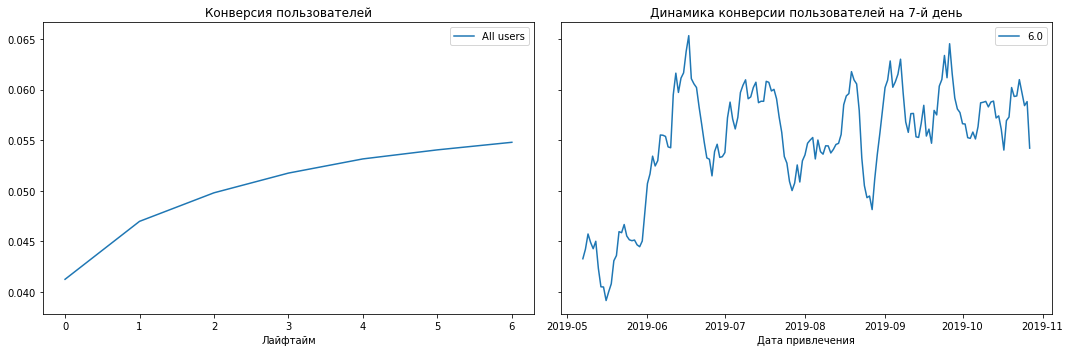

In [24]:
# смотрим общую конверсию
dimensions = []
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Общая конверсия растёт: от 4% в первый день «жизни» пользователей до  5.5% на 7 день.

**Узнаем, из каких стран привлекаются пользователи и найдем долю платящих**

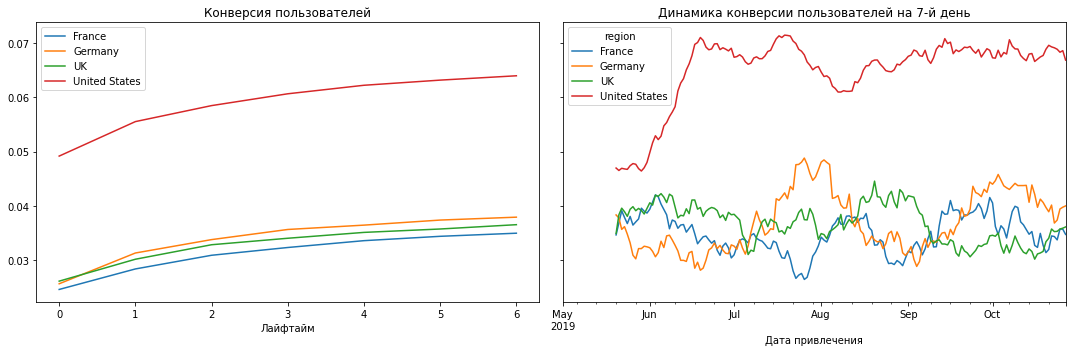

In [25]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# сделаем окно более широким - 20 дней, чтобы увеличить читаемость графика
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=20)

In [26]:
regions = profiles.groupby('region').agg({'user_id' : 'nunique', 'payer' : ['sum', 'mean']})
regions.columns = ['Пользователи', 'Платящие пользователи', 'Доля платящих']
regions.sort_values(by='Доля платящих', ascending=False).style.format({'Платящие пользователи' : '{:.0f}', 'Доля платящих' : '{:.2%}'})

,Пользователи,Платящие пользователи,Доля платящих
region,,,
United States,100002,6871,6.87%
Germany,14981,614,4.10%
UK,17575,690,3.93%
France,17450,657,3.77%


Видно, что пользователей из Америки больше всего, также есть пользователи из Германии, Англии и Франции. 

Максимальная доля платящих также в Америке - 6.87%, среднем по всем странам платит каждый 20-й пользователь.

**Узнаем какими устройствами пользуются пользователи**

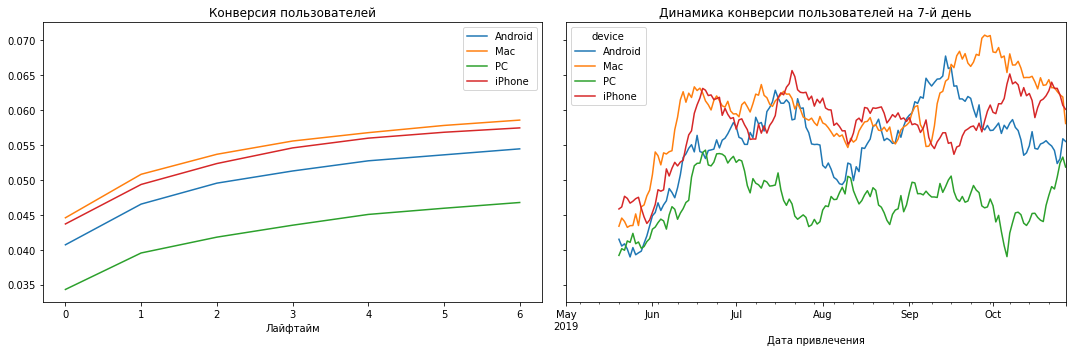

In [27]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# сделаем окно сглаживания более широким - 20 дней, чтобы увеличить читаемость графика
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=20)

In [28]:
devices = profiles.groupby('device').agg({'user_id' : 'nunique', 'payer' : ['sum', 'mean']})
devices.columns = ['Пользователи', 'Платящие пользователи', 'Доля платящих']
devices.sort_values(by='Доля платящих', ascending=False).style.format({'Платящие пользователи' : '{:.0f}', 'Доля платящих' : '{:.2%}'})

,Пользователи,Платящие пользователи,Доля платящих
device,,,
Mac,30042,1904,6.34%
iPhone,54479,3367,6.18%
Android,35032,2036,5.81%
PC,30455,1525,5.01%


В целом пользователи Mac, iPhone и Android конвертируются лучше PC. 

**Узнаем каналы привлечения пользователей**

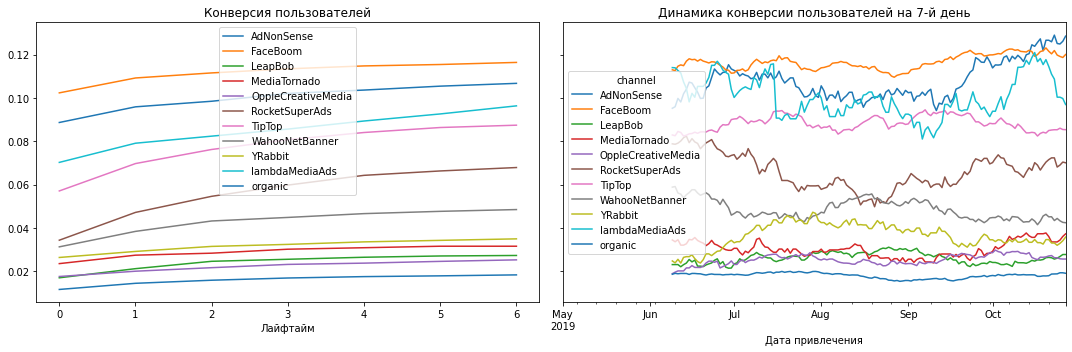

In [29]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# сделаем окно более широким - 40 дней, чтобы увеличить читаемость графика
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=40)

In [30]:
channels = profiles.groupby('channel').agg({'user_id' : 'nunique', 'payer' : ['sum', 'mean']})
channels.columns = ['Пользователи', 'Платящие пользователи', 'Доля платящих']
channels.sort_values(by='Доля платящих', ascending=False).style.format({'Платящие пользователи' : '{:.0f}', 'Доля платящих' : '{:.2%}'})

,Пользователи,Платящие пользователи,Доля платящих
channel,,,
FaceBoom,29144,3543,12.16%
AdNonSense,3880,437,11.26%
lambdaMediaAds,2149,222,10.33%
TipTop,19561,1870,9.56%
RocketSuperAds,4448,350,7.87%
WahooNetBanner,8553,447,5.23%
YRabbit,4312,164,3.80%
MediaTornado,4364,156,3.57%
LeapBob,8553,258,3.02%


Графики конверсии стабильны, конверсия у каналов FaceBoom и AdNonSense выше остальных.

**Вывод**

+ Общая конверсия растёт: от 4% в первый день «жизни» пользователей до 5.5% на 7 день.
+ Пользователей из Америки больше всего, также есть пользователи из Германии, Англии и Франции. Максимальная доля платящих также в Америке - 6.87%, среднем по всем странам платит каждый 20-й пользователь.
+ В целом пользователи Mac, iPhone и Android конвертируются лучше PC.
+ Графики конверсии стабильны, конверсия у каналов FaceBoom и AdNonSense выше остальных.

### Анализ расходов на маркетинг


**Найдем сумму расходов на маркетинг и распределение расходов по каналам**

In [31]:
print('Общая сумма расходов на маркетинг:', costs['costs'].sum())
print()
print('Распределение расходов на маркетинг по каналам:')

f=costs.groupby('channel').agg({'costs':'sum'})
f['%']=f['costs']/costs['costs'].sum()
f.columns=['Расходы на маркетинг','Доля расхода']
f.sort_values(by='Расходы на маркетинг', ascending=False).style.format({'Расходы на маркетинг' : '{:.0f}', 'Доля расхода' : '{:.2%}'})

Общая сумма расходов на маркетинг: 105497.30000000002

Распределение расходов на маркетинг по каналам:


,Расходы на маркетинг,Доля расхода
channel,,
TipTop,54751,51.90%
FaceBoom,32446,30.75%
WahooNetBanner,5151,4.88%
AdNonSense,3911,3.71%
OppleCreativeMedia,2151,2.04%
RocketSuperAds,1833,1.74%
LeapBob,1798,1.70%
lambdaMediaAds,1558,1.48%
MediaTornado,954,0.90%


Максимальные затраты на маркетинг были для приложений TipTop & FaceBoom и в сумме сосавили 83% от общих расходов

**Визуализация изменения метрик во времени**

Посмотрим расходы на маркетинг по месяцам и неделям по каждому источнику

In [32]:
costs['month']=pd.to_datetime(costs['dt']).dt.month
costs['week']=pd.to_datetime(costs['dt']).dt.week

/tmp/ipykernel_189/1037536215.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  costs['week']=pd.to_datetime(costs['dt']).dt.week


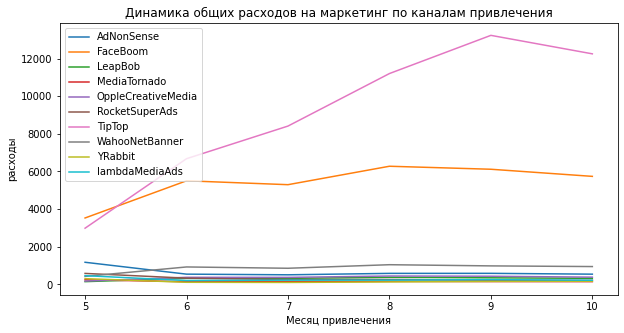

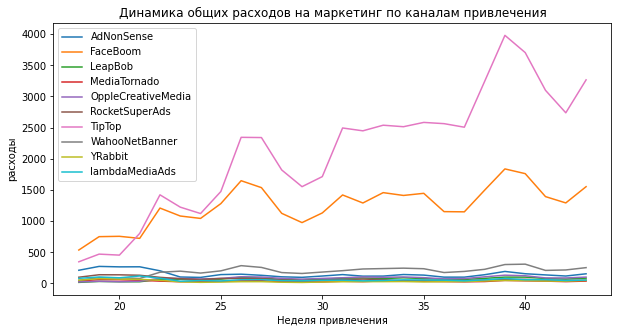

In [33]:
costs.pivot_table(index='month', columns='channel', values ='costs', aggfunc='sum').plot(grid=False,figsize=(10, 5))
plt.ylabel('расходы')
plt.xlabel('Месяц привлечения')
plt.title('Динамика общих расходов на маркетинг по каналам привлечения')
plt.legend(loc='center left', bbox_to_anchor=(0, 0.7))

costs.pivot_table(index='week', columns='channel', values ='costs', aggfunc='sum').plot(grid=False,figsize=(10, 5))
plt.ylabel('расходы')
plt.xlabel('Неделя привлечения')
plt.title('Динамика общих расходов на маркетинг по каналам привлечения')
plt.legend(loc='center left', bbox_to_anchor=(0, 0.7))
plt.show()

Видно, что максимальные расходы были на TipTop и FaceBoom

**CAC**

Посмотрим, сколько в среднем стоило привлечение одного пользователя из каждого источника.

Но перед этим исключим "органических" пользователей из анализа, т.к. стоимость их привлечения равна нулю и при этом они увеличат размер когорт, что исказит результаты расчетов.

In [34]:
profiles_clean = profiles.query('channel != "organic"')

Для начала рассчитаем средний CAC на одного пользователя для всего проекта.

In [35]:
print('Cредний CAC на одного пользователя для всего проекта:', profiles_clean['acquisition_cost'].mean())

Cредний CAC на одного пользователя для всего проекта: 1.1274813239427588


Рассчитаем средний CAC для каждого источника трафика.

In [36]:
print('Распределение расходов на маркетинг по каналам:')

profiles_clean.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)

Распределение расходов на маркетинг по каналам:


,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Визуализация САС**

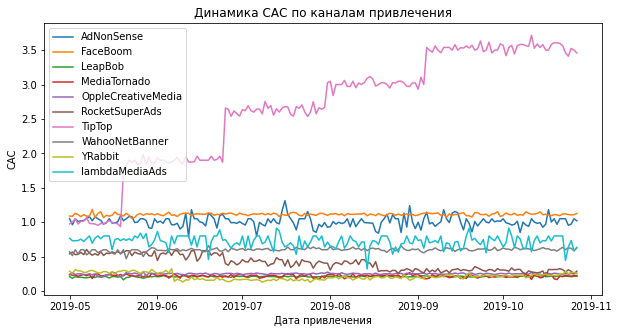

In [37]:
profiles_clean.pivot_table(index='dt', columns='channel', values ='acquisition_cost', aggfunc='mean').plot(grid=False, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(loc='center left', bbox_to_anchor=(0, 0.7))
plt.show()

**Выводы**

Общая сумма расходов на маркетинг: 105497.

Из всех рекламных каналов выделяется канал "Tip Top", САС по которому составил 2,8, что более, чем в 2,5 раз дороже, чем следующего за ним канала "FaceBoom". Причем, стоимость росла резкими скачками от месяца к месяцу, достигнув в сентябре 3,5.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 


Установим момент и горизонт анализа данных.

При решении этого шага будем считать, что смотрим данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [38]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

**Анализ общей окупаемости рекламы**

Рассчитаем и визуализируем LTV, ROI и CAC

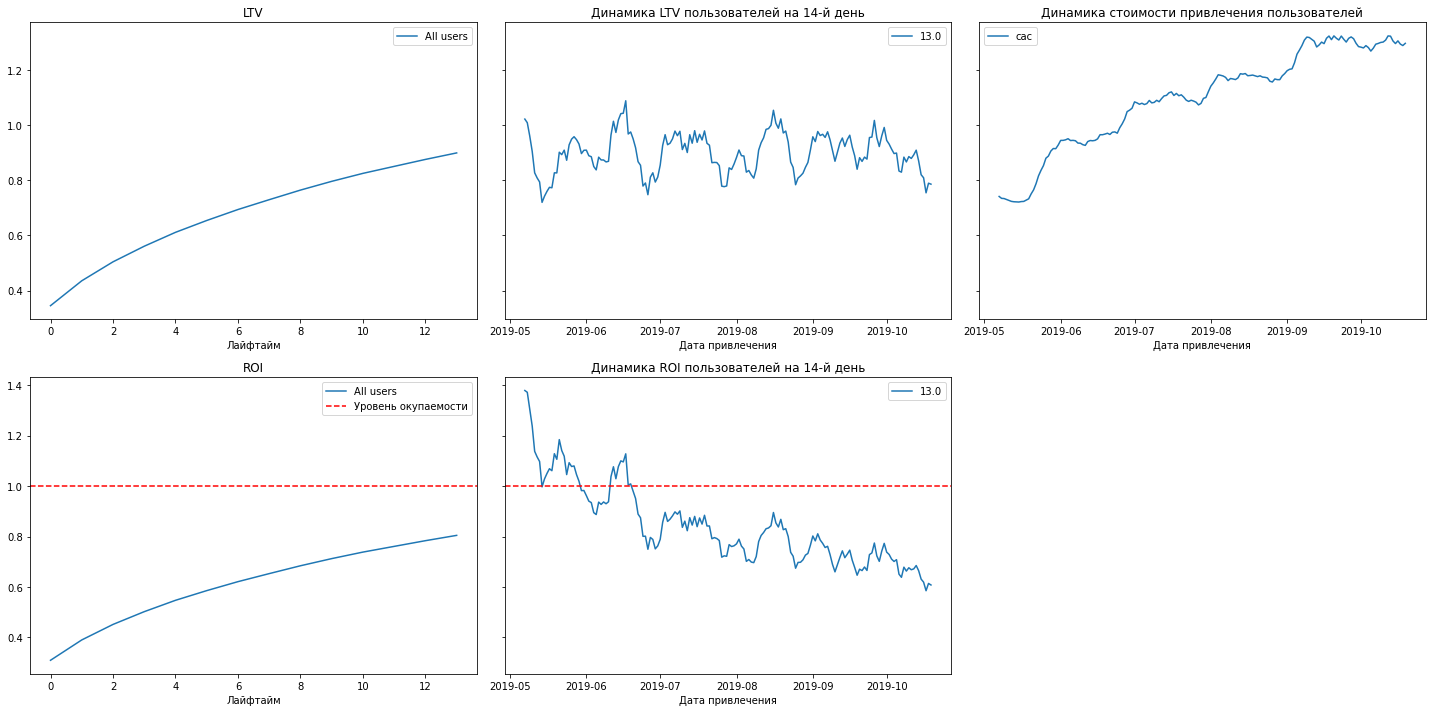

In [39]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_clean, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Видно, что реклама не окупается. ROI в конце срока привлечения пользователей — чуть выше 80%. LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

**Анализ окупаемости рекламы с разбивкой по устройствам**


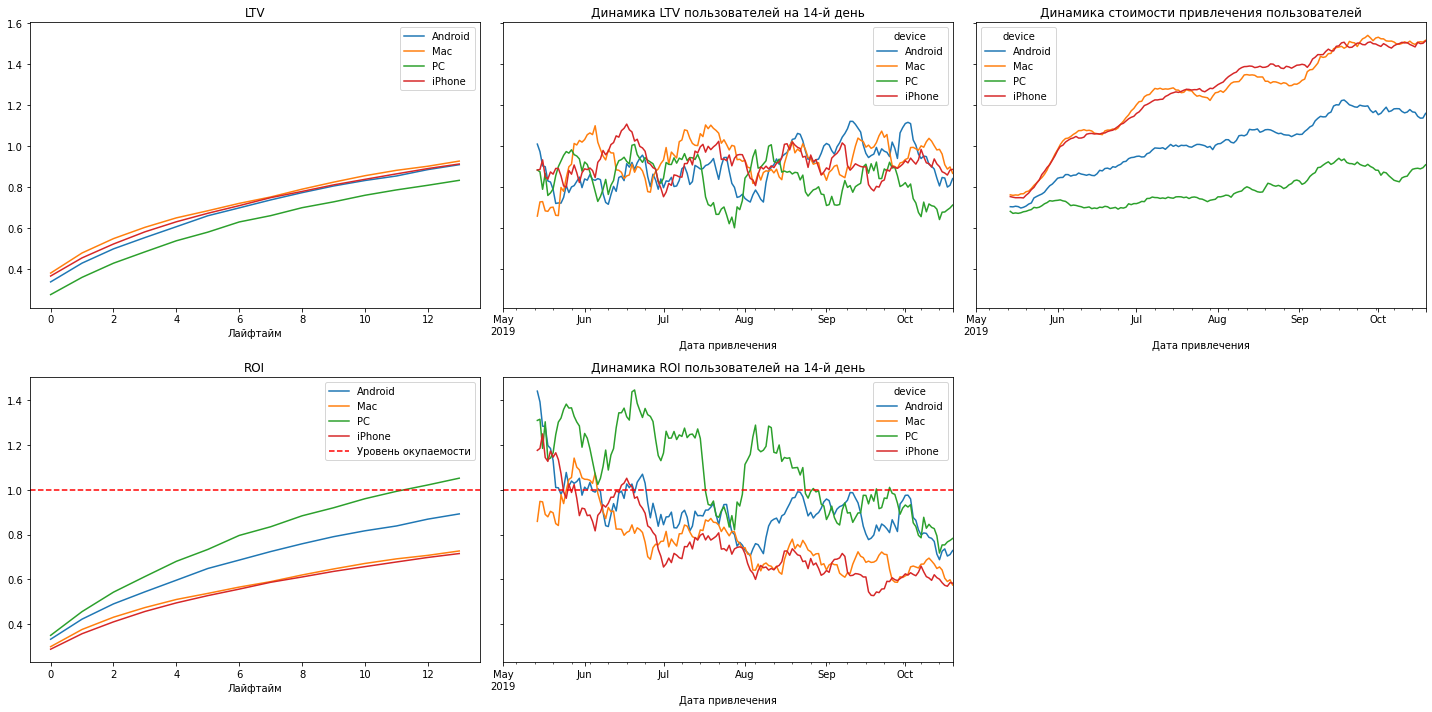

In [40]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_clean, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Не смотря на то, что пльзователи PC имеют самый низкий LTV, эта категория единственная, которая окупает затраты на привлечение. А самую высокую стоимость привлечения имеют пользователи iPhone и Mac-устройств.

**Анализ окупаемости рекламы с разбивкой по странам**

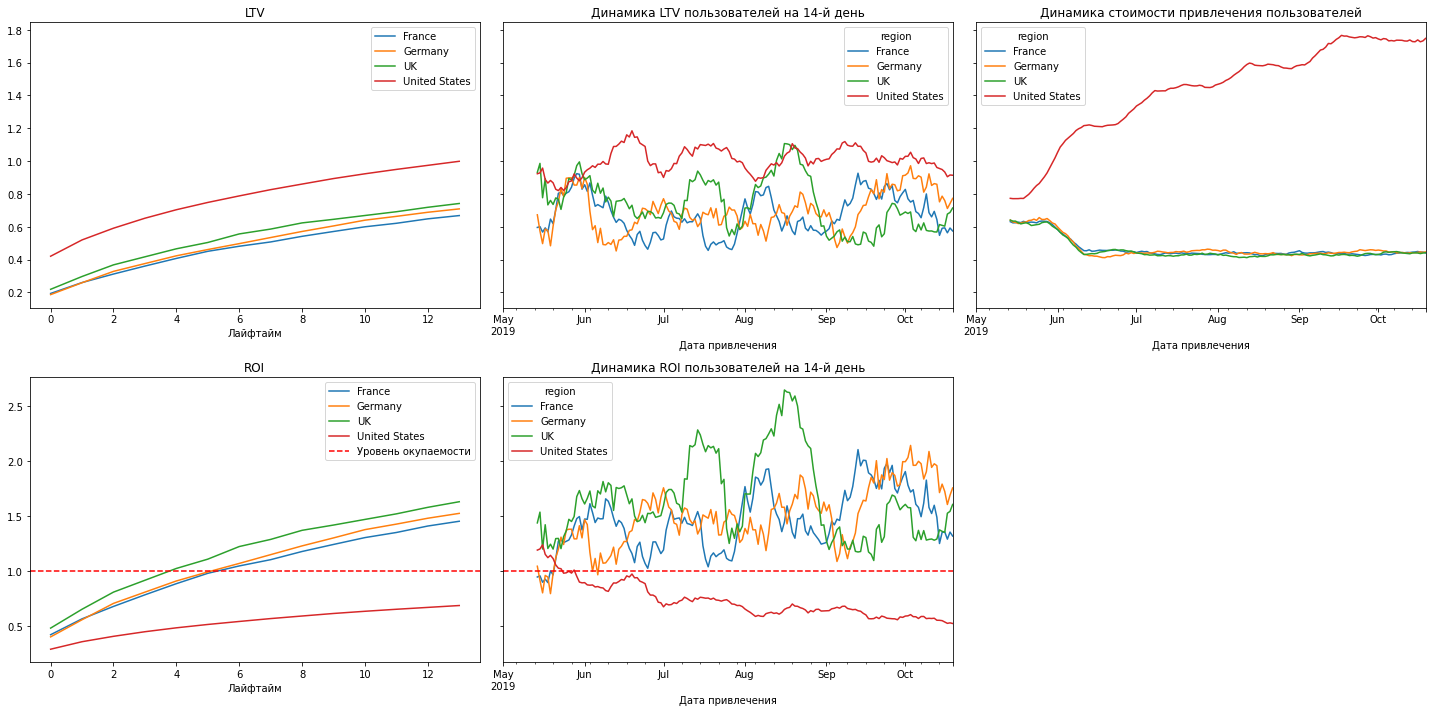

In [41]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_clean, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Привлечение пользователей из США обходится слишком дорого: они даже не окупаются, не смотря на то, что имеют самый высокий LTV.

**Анализ окупаемости рекламы с разбивкой по рекламным каналам**

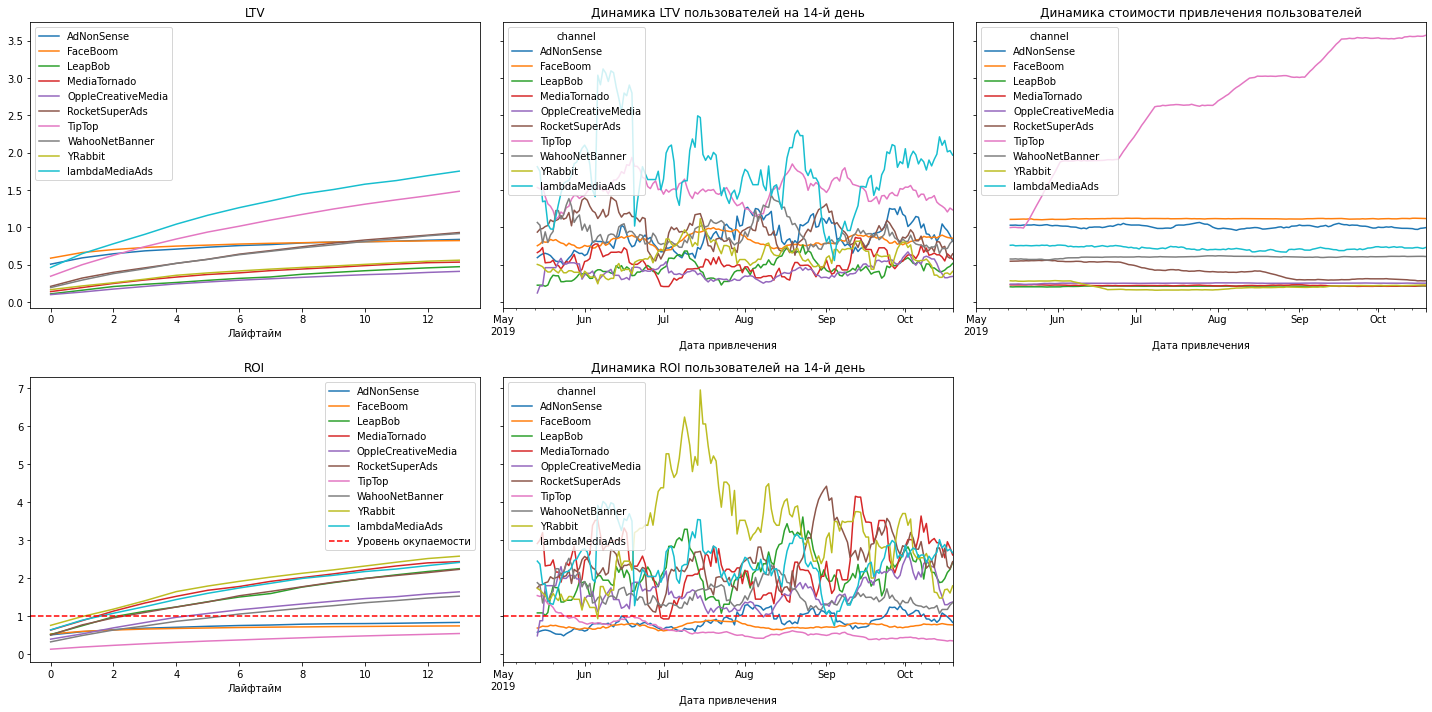

In [42]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_clean, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Максимум затрат приходится на канал TipTop и он при этом меньше всего окупается. Также не окупаются затраты на AdNonSense & FaceBoom.

Самый высокий LTV у каналов lambdaMediaAds и TipTop.

**Анализ retention rate**

Посмотрим удержание пользователей с разбивкой по устройствам.

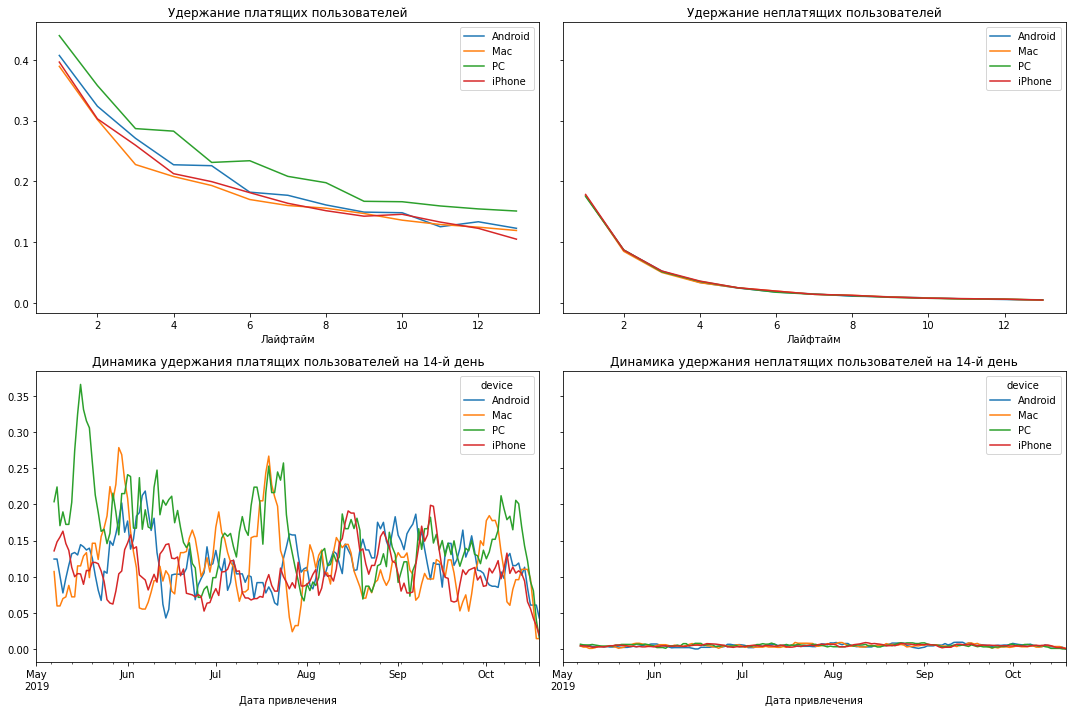

In [43]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самые качественные платящие пользователи - пользователи PC. Нет существенных отличий между неплатящими пользователями

Посмотрим удержание с разбивкой по странам.

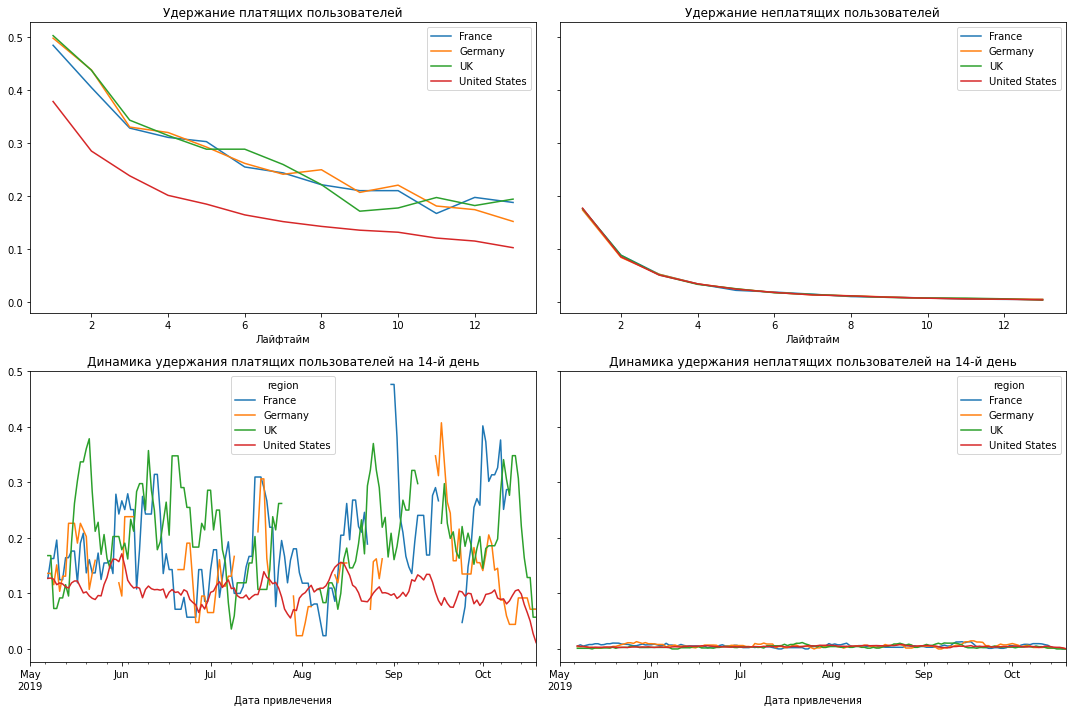

In [44]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи из Америки тратят деньги менее охотно, чем в других странах. 

Посмотрим удержание с разбивкой по рекламным каналам  

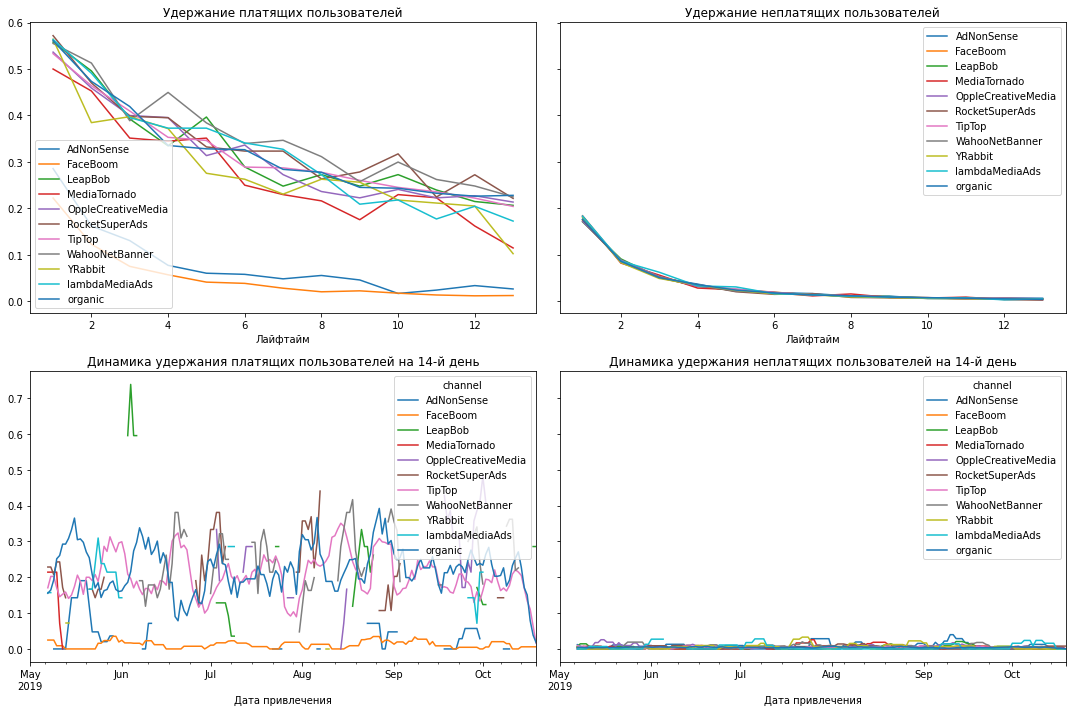

In [45]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

С каналом TipTop маркетологам нужно поработать - он привлекает качественных пользователей. А вот каналы FaceBoom и AdNonSense имеют значительно более низкий коэффициент удержания, чем остальные каналы.

Самое высокое удержание у каналов RocketSuperAds и WahooNetBanner.

**Сравнительный анализ окупаемости рекламы в США и Европы**

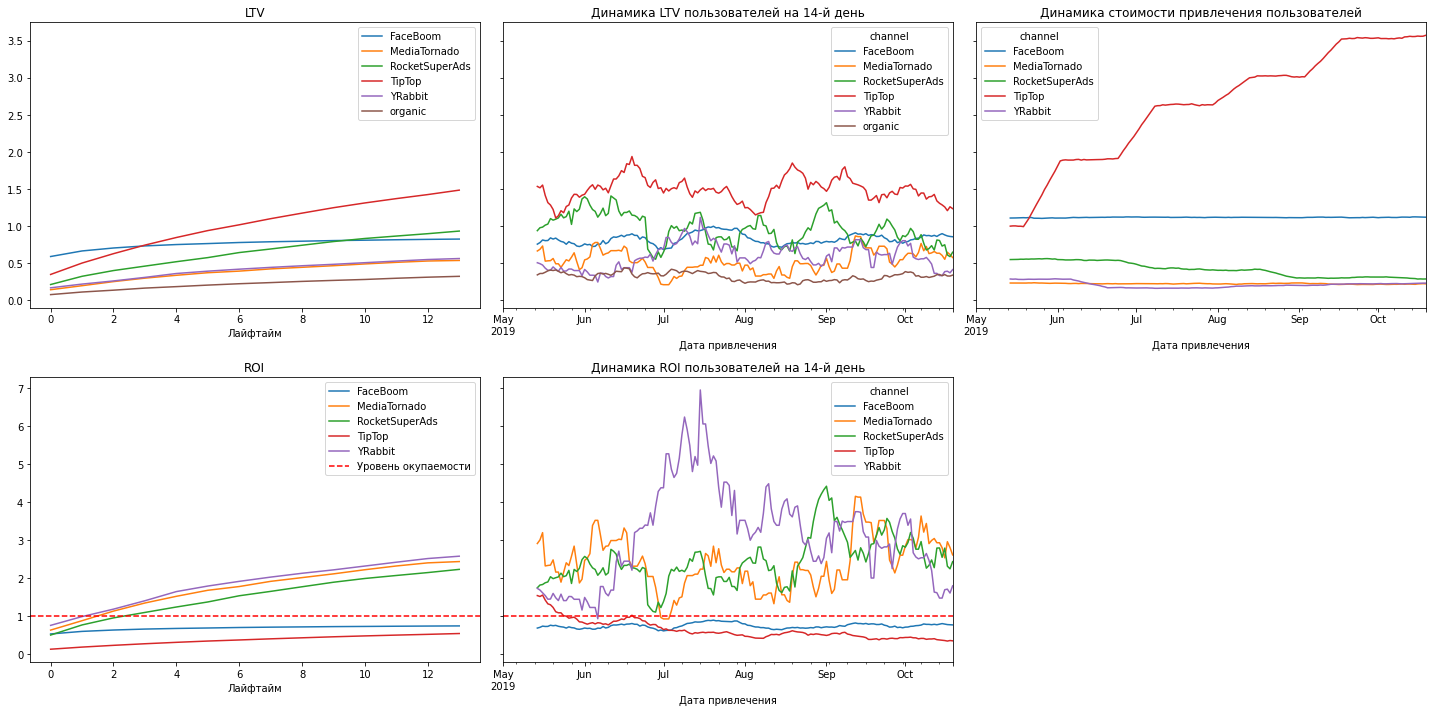

In [46]:
# делаем срез по США
profiles_usa = profiles.query('region == "United States"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

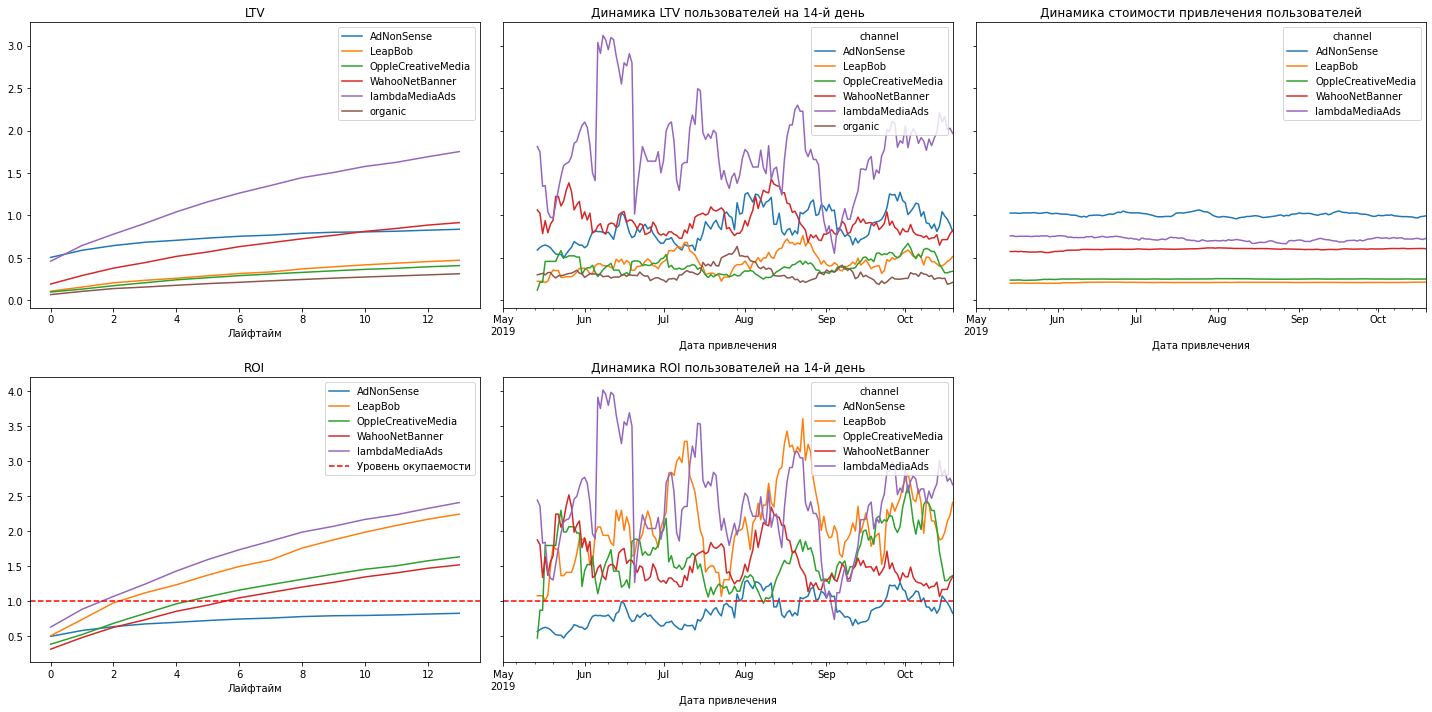

In [47]:
# делаем срез по Европе
profiles_not_usa = profiles.query('region != "United States"')

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Видно, что Европейцы не пользуются каналами FaceBoom и TipTop. Именно поэтому США проседает в показателях на предыдущих графиках в отличие от Европы (на привлечение пользователей FaceBoom и TipTop тратят больше всего в США). 

Наименее эффективный канал в Европе - AdNonSence 

**Посмотрим окпуаемость с разбивкой по устройствам в США и Европе**

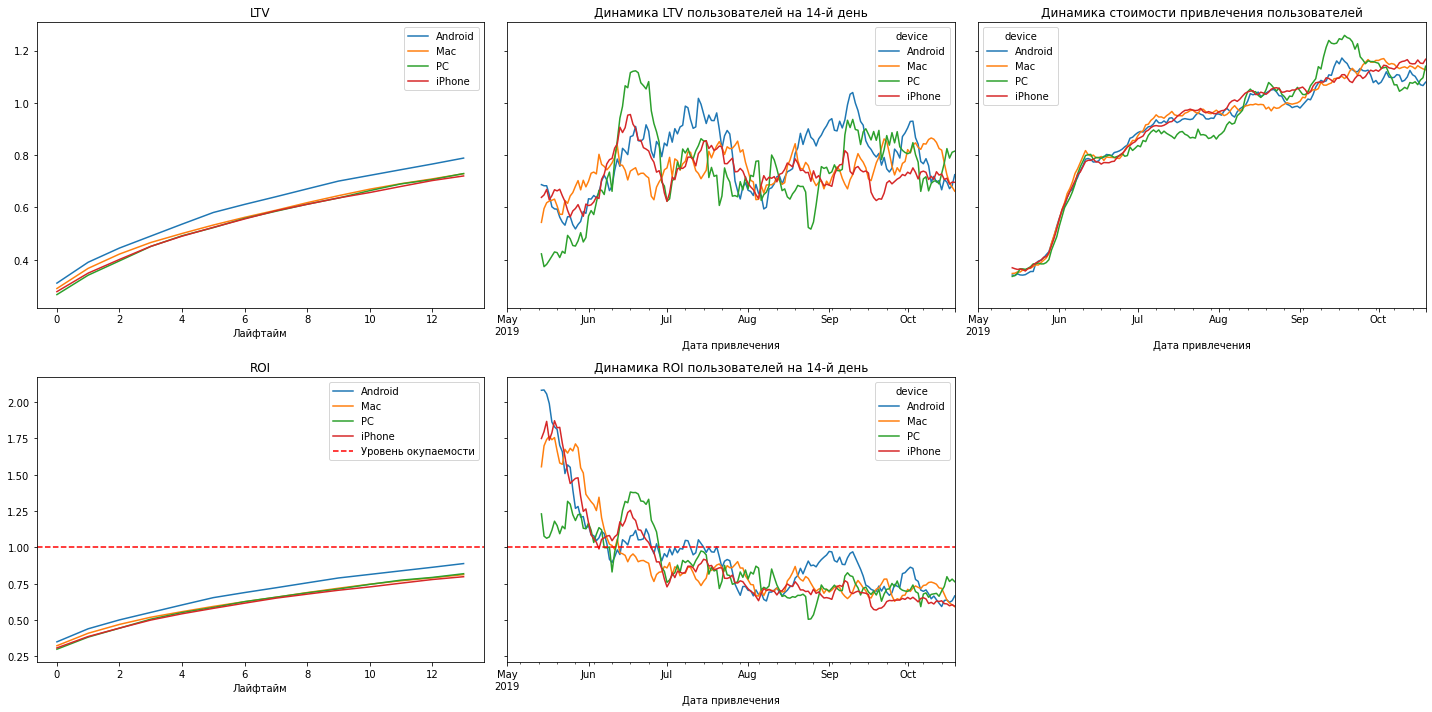

In [48]:
dimensions = ['device'] ## США

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

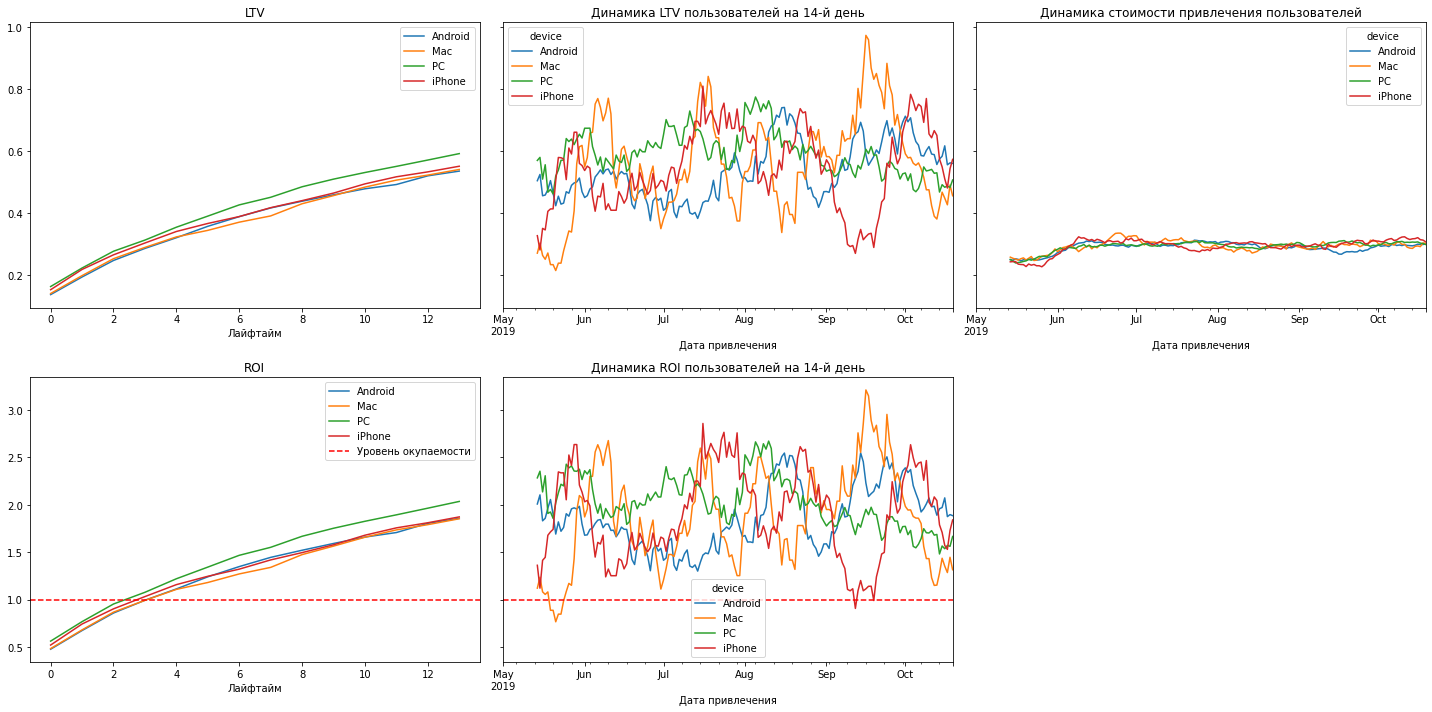

In [49]:
dimensions = ['device'] ##Европа

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В Европе окупается реклама со всех устройств, в то время, когда в США ни одна реклама не окупилась, что говорит о региональных различиях: В США имеются проблемы с рекламными каналами



**Выводы**

+ Анализ общей окупаемости рекламы показал, что она не окупается. ROI в конце срока привлечения пользователей — чуть выше 80%. LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
+ Динамика CAC показала выраженный скачкообразный рост, начиная с июня и с этого же периода видна обратная динамика ROI. И оба этих показателя соответствуют динамике роста расходов на рекламный канал TipTop.
+ Анализ по странам показал, что основные расходы на рекламу приходятся на пользователей из США, с этим же связаны максимальные расходы и минимальная окупаемость на Mac-устройствах и iPhone, если исходить из того, что пользователи США пользуются преимущественно этими устройствами. Динамика по обоим показателям соответствует динамикам по общим расходам и каналу TipTop.
+ То, что проблема не в устройствах, а именно с пользователями из США показал анализ удержания по устройствам и странам. Удержание по устройствам находится на одном уровне, а вот удержание пользователей из США выраженно ниже, чем из других стран. И это касается только платящих пользователей.
+ Дополнительный анализ рекламных источников пользователей США в сравнении с остальными странами показал, что рекламными каналами TipTop и FaceBoom пользовались только в США. Этим можно объяснить столь негативное отличие окупаемости рекламы в этой стране от остальных стран.
+ Сравнительный анализ по устройствам показал, что негативный ROI на общих графиках имеет региональные особенности - неокупаемость в США, в отличие от европейских стран. Что дополнительно указывает на то, что это связано прежде всего (а может и исключительно) с проблемными рекламными каналами, а не с самими устройствами.
+ Анализ удержания пользователей по рекламным каналам показал, что TipTop привлекает качественных пользователей. А вот каналы FaceBoom и AdNonSense имеют значительно более низкий коэффициент удержания, чем остальные каналы. И при этом стоимость привлечения пользователей у них самая высокая после TipTop.
+ Самый высокий LTV у каналов lambdaMediaAds и TipTop.
+ Самое высокое удержание у каналов RocketSuperAds и WahooNetBanner.

### Итоги

+ В результате проведенного анализа бизнес-показателей был определен сверх затратный по расходам рекламный канал TipTop, привлекающий пользователей в США. С июня расходы на данный канал выросли с 1,5 до 3,5 доллара за пользователя, что больше в 3.5 раза, чем расходы на рекламный канал FaceBoom. 

+ Показатели конверсии и удержания у канала TipTop на хорошем уровне.

+ Еще два рекламных канала FaceBoom и AdNonSense, имея следующий после TipTop уровень CAC имеют значительно более низкий уровень удержания пользователей, чем остальные каналы.

+ То, что неокупаемость рекламы связана с рекламными каналами в США ( TipTop  и FaceBoom) доказывает окупаемость рекламы во Франции, Германии и Великобритании и позитивный ROI по устройствам в этих же европейских странах в отличие от США.


### Рекомендации 

+ Выяснить причины значительного повышения расходов на рекламный канал TipTop и нормализовать их, не отказываясь от самого канала при возможности сократить расходы на него в 3,5 раза;

+ Отказаться от использования каналов FaceBoom и AdNonSense;

+ Перераспределить бюджет в пользу рекламных каналов lambdaMediaAds, RocketSuperAds и WahooNetBanner, которые привлекают наиболее качественных пользователей по средним ценам.